In [398]:
import pandas as pd
import numpy as np

@author: MUSTAFA YALINIZ

In [399]:
# Veriyi oku
data = pd.read_csv('veriler.csv')
data.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [400]:
# Veriyi bagimli bagimsiz degiskenlere bol
X = data.iloc[:, 1:4].values
Y = data.iloc[:, 4].values

In [401]:
# Veriyi Test ve Train olarak ayir
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [402]:
# Veriyi egit ve tahminde bulun
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5, criterion='entropy',random_state=0) # criterion= 'gini' de kullanilabilir, n_estimators= 10 
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)
print(pred)

['e' 'k' 'e' 'k' 'e' 'k' 'e' 'k']


In [403]:
# Confusion matrixi gor
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)
true = cm[0][0] + cm[1][1]
false = cm[1][0] + cm[0][1]
print('Confusion Matrix')
print(cm)
print(f'Durum: {true+false}, Dogru: {true}, Yanlis: {false}')

Confusion Matrix
[[1 0]
 [3 4]]
Durum: 8, Dogru: 5, Yanlis: 3


In [404]:
# X_Test icin ortalama al
X_mean = np.mean(X_test, axis=1)
X_mean = X_mean.reshape(-1, 1)

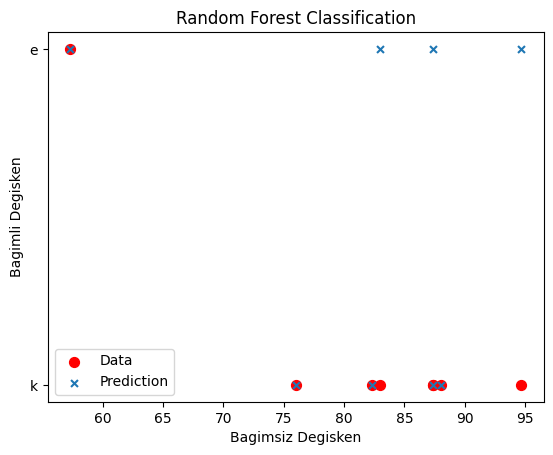

In [405]:
# Goruntu olustur
from matplotlib import pyplot as plt
plt.scatter(X_mean,Y_test, color='red', label='Data',s=50)
plt.scatter(X_mean,rfc.predict(X_test), label='Prediction',s=25,marker='x')
plt.xlabel('Bagimsiz Degisken')
plt.ylabel('Bagimli Degisken')
plt.title('Random Forest Classification')
plt.legend()
plt.show()